<a href="https://colab.research.google.com/github/Alenushka2013/Khpi_master_studing/blob/main/4k(MedHouseVal).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing


housing = fetch_california_housing(as_frame=True)
df = housing.frame.copy()
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
print(df.info())
print(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
               count         mean          std         min         25%  \
MedInc       20640.0     3.870671     1.899822    0.499900    2.563400   
HouseAge     20640.0    28.639486    12.585558    1.000000   18.000000   
AveRooms     20640.0     5.429000     2.474173    0.846154    4.440716   
AveBedrms    20640.0     1.096675     0.473911    0.333333    1.006079   
Population   20

In [ ]:
print(f"Null:\n{df.isnull().sum()}")

Null:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


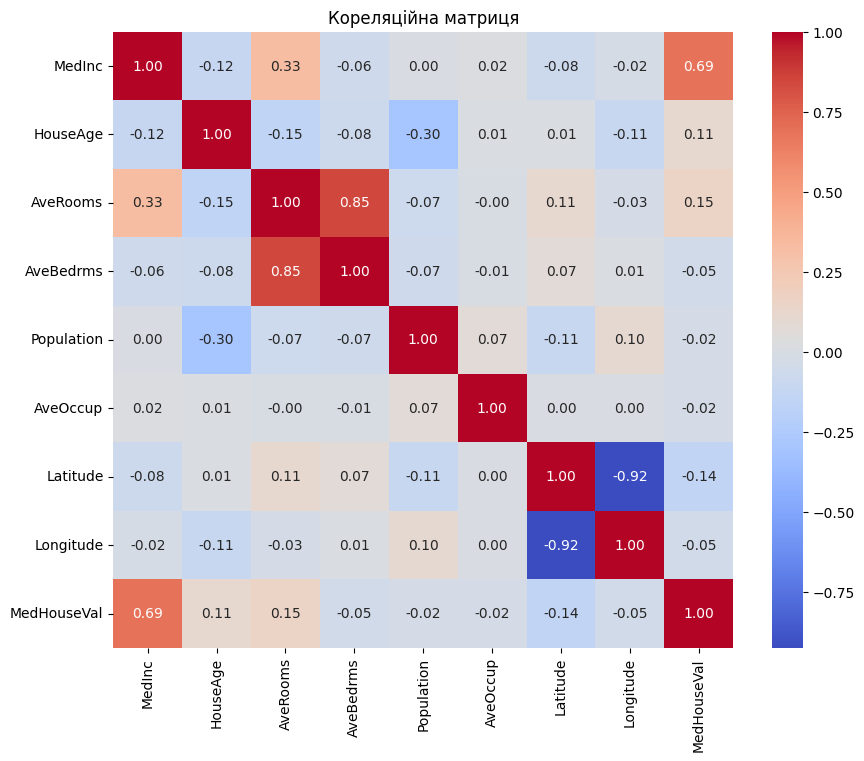

In [ ]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Кореляційна матриця")
plt.show()

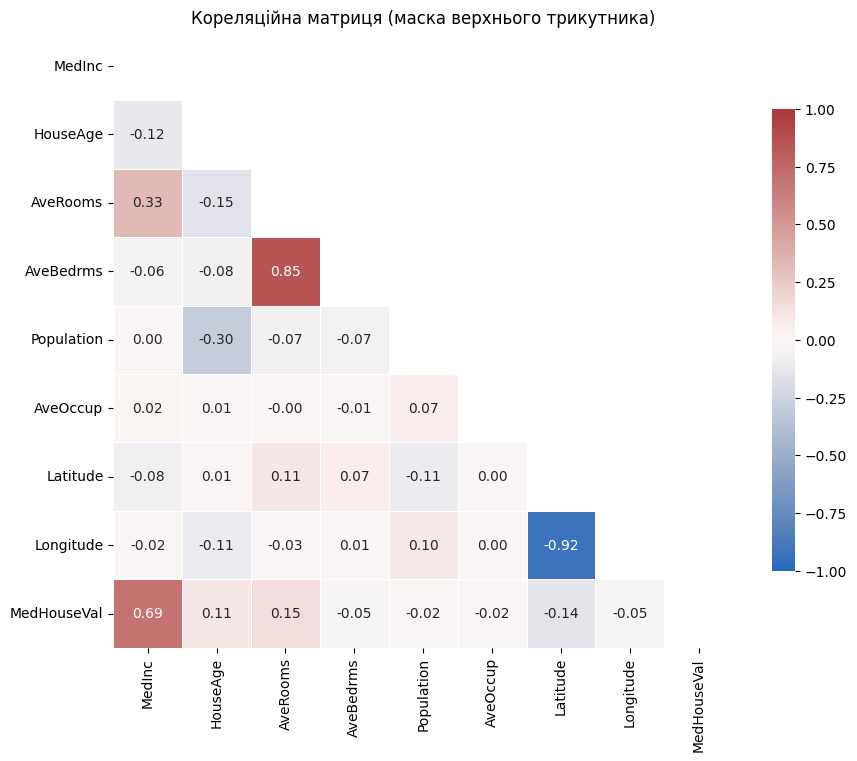

In [ ]:
plt.figure(figsize=(10,8))
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    mask=mask,
    cmap="vlag",
    vmin=-1, vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": .75}
    )

plt.title("Кореляційна матриця (маска верхнього трикутника)")
plt.show()

In [ ]:
corr_target = df.corr()['MedHouseVal'].sort_values(ascending=False)
print(corr_target)

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


In [ ]:
from scipy.stats import pearsonr

results = []
for col in df.columns.drop("MedHouseVal"):
  pair = df[[col, "MedHouseVal"]].dropna()
  r, p = pearsonr(pair[col], pair["MedHouseVal"])
  results.append((col, r, p))

pd.DataFrame(results, columns=["feature", "r", "p"]).sort_values("r", ascending=True)

,feature,r,p
6,Latitude,-0.144160,2.939859e-96
3,AveBedrms,-0.046701,1.912589e-11
7,Longitude,-0.045967,3.923322e-11
4,Population,-0.024650,3.976308e-04
5,AveOccup,-0.023737,6.483442e-04
1,HouseAge,0.105623,2.761861e-52
2,AveRooms,0.151948,7.569242e-107
0,MedInc,0.688075,0.000000e+00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[["MedInc"]]
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Середньоквадратична помилка (MSE):", mse)
print("Коефіцієнт детермінації (R^2):", r2)

Середньоквадратична помилка (MSE): 0.7091157771765549
Коефіцієнт детермінації (R^2): 0.45885918903846656


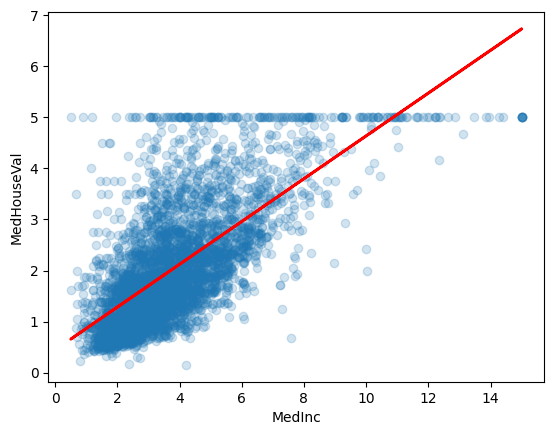

In [ ]:
plt.scatter(X_test, y_test, alpha=0.2, label="real")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="predict")
plt.xlabel("MedInc")
plt.ylabel("MedHouseVal")
plt.show()

#Багатовимірна лінійна регресія для прогнозу ціни на житло

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
housing = fetch_california_housing()
print(housing)

df = pd.DataFrame(housing.data, columns=housing.feature_names)
# print(df)

df["MedHouseVal"] = housing.target
# print(housing.target)

df.head()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Середньоквадратична помилка (MSE):", mse)
print("Коефіцієнт детермінації (R^2):", r2)

Середньоквадратична помилка (MSE): 0.5558915986952444
Коефіцієнт детермінації (R^2): 0.5757877060324508


ValueError: x and y must be the same size

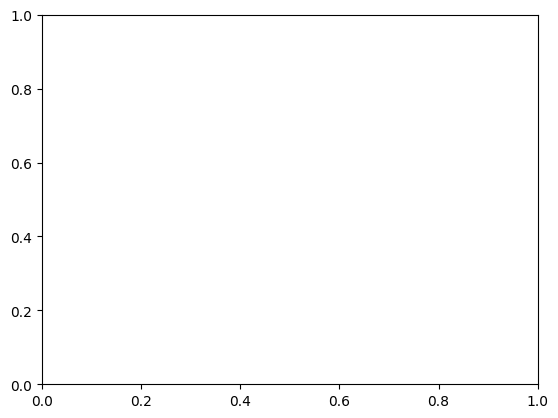

In [ ]:
plt.scatter(X_test, y_test, alpha=0.2, label="real")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="predict")
plt.xlabel("багатовимірність")
plt.ylabel("MedHouseVal")
plt.show()

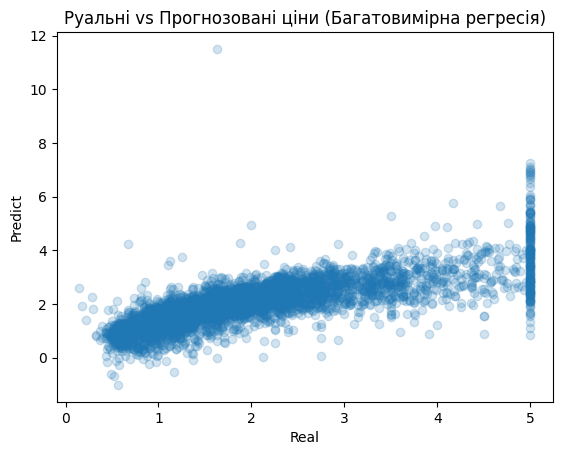

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.2)
plt.xlabel("Real")
plt.ylabel("Predict")
plt.title("Руальні vs Прогнозовані ціни (Багатовимірна регресія)")
plt.show()